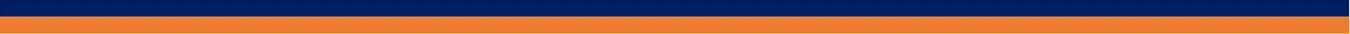


<h1><center><font size=10><a name='link6'>Data Science and Business Analytics</a></center></font></h1>


<h1><center> Practice Project 25 </center></h1>

<h1><center>Dashboard for Banking Customer Churn </center></h1>



<h1><center> By </center></h1>



<h1><center>Hayford Osumanu </center></h1>



<h1><center>April  2023 </center></h1>


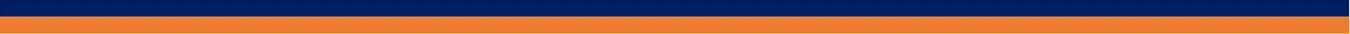

<img src="https://media1.giphy.com/media/B1xUp52rUnrv1Leakw/giphy.gif?cid=ecf05e474uu1n7n5jvml69duzey3lgtcwowq6txw47ktbfpq&rid=giphy.gif&ct=g.gif" width="750" height="500" align="center">

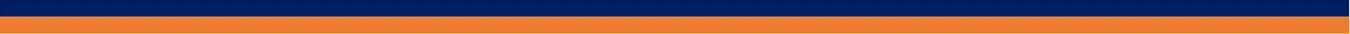

# <h1><left><font size=8><a name='link6'>Data Analysis Philosophy</a></center></font></h1>

In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


<IPython.core.display.Javascript object>

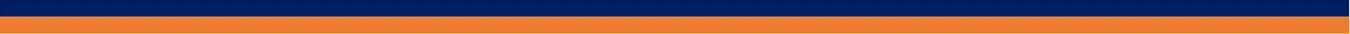

In [ ]:
# installing the needed upgrade optimum performance
!pip install nb_black
!pip install ipython --upgrade
!pip install xgboost
# installing the needed upgrade optimum performance
!pip install squarify
!pip3 install folium==0.5.0
# installing the needed upgrade optimum performance
!pip install plotly==5.13.0
!pip install dash
!pip install jupyter-dash
!pip install tensorflow
# installing Panel 
!pip3 install hvplot jupyterlab
!pip install ipywidgets
!pip install --upgrade holoviews hvplot panel param
!pip install holoviews, 
!pip install hvplot

In [2]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

In [3]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns



# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Command to tell Python to actually display the graphs
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200);

import warnings

warnings.filterwarnings("ignore")

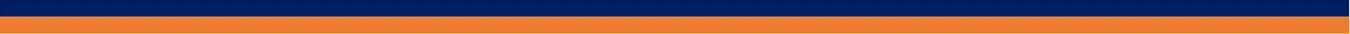

# <h1><left><font size=8><a name='link6'>Importing the Dataset into DataFrame</a></center></font></h1>

In [88]:
path="https://raw.githubusercontent.com/hayfordosmandata/DataBank/main/Bank_Churn1.csv"

In [89]:
churn_data=pd.read_csv(path)
# copying data to another variable to avoid any changes to original data
data = churn_data.copy()

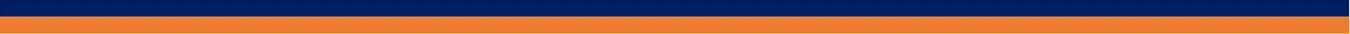

# <h1><left><font size=8><a name='link6'>Part I: Dataset Overview </a></center></font></h1>

In [146]:
import panel as pn
import seaborn as sb

# Create a Tabulator widget with pagination
table = pn.widgets.Tabulator(data.head(10000), pagination='remote')

# Display the widget in a Panel
panel = pn.Column('## First 20 Rows of Insurance Premium Dataset with Pages', table)
panel.servable()

Column
    [0] Markdown(str)
    [1] Tabulator(pagination='remote', value=    CreditScore G...)

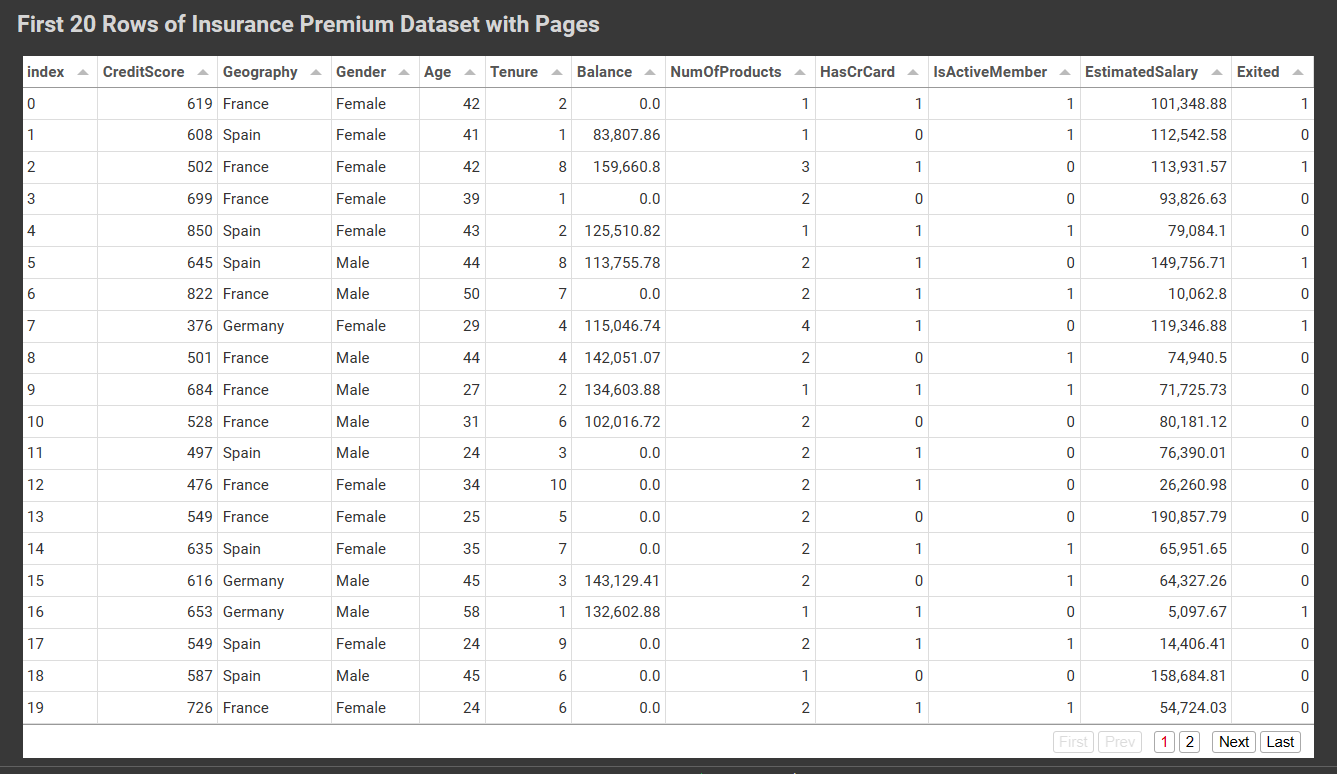

In [92]:
import panel as pn
import seaborn as sb

# Create a Tabulator widget with pagination
table = pn.widgets.Tabulator(data.head(5000), pagination='remote')

# Display the widget in a Panel
panel = pn.Column('## First 20 Rows of Insurance Premium Dataset with Pages', table)
panel.servable()

Column
    [0] Markdown(str)
    [1] Tabulator(pagination='remote', value=      RowNumber  ...)

image.png

### Columns/Variable/Features of the Dataset

In [93]:
# Extracting the columns/variables of the dataset
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

The data in the tables above contains information of different attributes of  Customers based on their transaction history. The detailed data dictionary is given below.

image.png

### Dimension of the Dataset

In [94]:
# checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 10000 rows and 14 columns.


In [95]:
# Checking the dimension (number of observations/rows and variables/columns of the Dataset (df.shape)
print("There are", data.shape[0], "rows and", data.shape[1], "columns.")

There are 10000 rows and 14 columns.


image.png

### Data Types of the Dataset

In [96]:
# Checking the data types of the variables/columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


image.png

## Data Sanity Checks: Deep Checking/scrutinity of the the dataset before EDA

### Checking the Missing Values of the Dataset

In [98]:
# Checking for missing values in the dataset
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [99]:
# Checking the total number of missing values in the dataset
data.isnull().sum().sum()

0

image.png

### Checking the Duplicates in the Dataset

In [100]:
# let's check for duplicate values in the data
data.groupby(data.duplicated(subset=None, keep="first"), as_index=False).size()

,index,size
0,False,10000


In [101]:
# checking for duplicate values
print("There are about: ", data.duplicated().sum(), "dupplicates in the dataset")

There are about:  0 dupplicates in the dataset


In [132]:
# Dropping the irrelevant columns
data.drop(['RowNumber', 'CustomerId',"Surname"], axis=1, inplace=True)

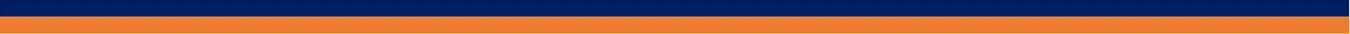

# <h1><left><font size=8><a name='link6'>Part II: Panel Dashboard Overview </a></center></font></h1>

## Dash 0: Outlier Detection Using Boxplot

In [133]:
import pandas as pd
import panel as pn
import hvplot.pandas

# Get the list of numerical columns
numeric_cols = data.select_dtypes(include=['float', 'int']).columns.tolist()

# Create the dropdown menu with numerical columns
dropdown = pn.widgets.Select(options=numeric_cols, name='Select a column')

# Define a function to update the plot based on the dropdown selection
def update_plot(event):
    plot = data.hvplot.box(y=event.obj.value, title='Box plot of ' + event.obj.value)
    return plot

# Create the initial plot with the first numerical column
initial_col = numeric_cols[0]
plot = data.hvplot.box(y=initial_col, title='Box plot of ' + initial_col, color="red")

# Combine the dropdown and the plot in a panel layout
dropdown.param.watch(update_plot, 'value')
layout = pn.Row(dropdown, plot)

# Create a layout and serve the app
layout.servable()

Row
    [0] Select(options=['CreditScore', ...], value='CreditScore')
    [1] HoloViews(BoxWhisker, height=300, sizing_mode='fixed', width=700)

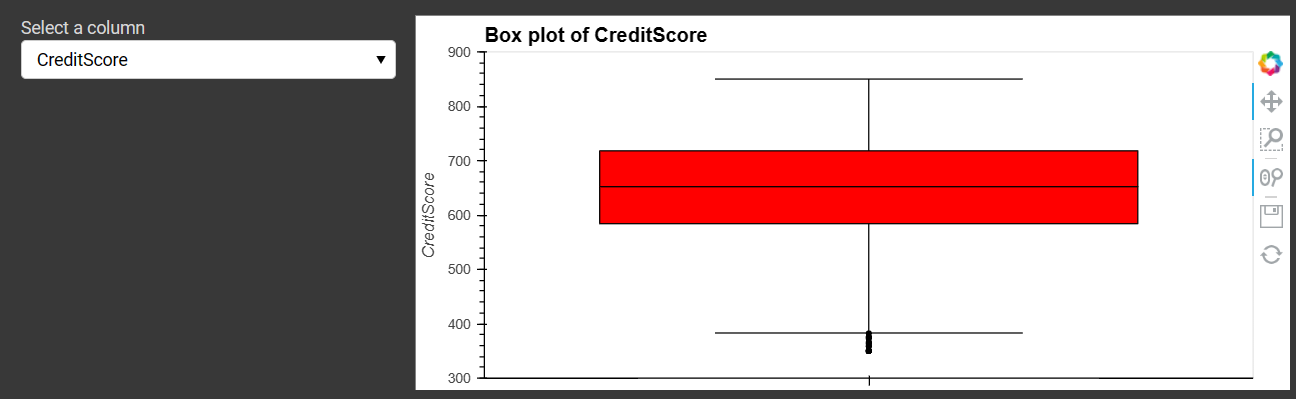

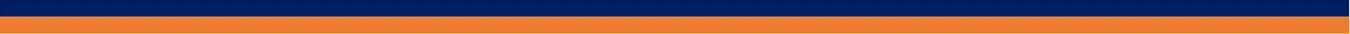

## Dash I: Select different Types of Charts Using Different Variables

In [134]:
import pandas as pd
import panel as pn
import hvplot.pandas
import holoviews as hv


# Define the available columns for the dropdowns
columns = list(data.columns)

# Define the available plot types for the dropdown
plot_types = {
    'Displot': 'hist',
    'Boxplot': 'box',
    'Line Chart': 'line',
    'Scatter Plot': 'scatter'
}

# Define the plots
def get_plots(column_x, column_y, plot_type):
    if plot_type == 'hist':
        plot = data.hvplot.hist(column_x, title=f'{column_x} Distribution', bins=20)
    elif plot_type == 'box':
        plot = data.hvplot.box(y=column_y, by='sex', title=f'{column_y} Distribution')
    elif plot_type == 'line':
        plot = data.hvplot.line(column_x, column_y, title=f'{column_y} by {column_x}')
    elif plot_type == 'scatter':
        plot = data.hvplot.scatter(column_x, column_y, c='sex', cmap='viridis', title=f'{column_y} vs {column_x}')
    return plot

# Define the dropdown widgets
dropdown_x = pn.widgets.Select(name='Horizontal Variables', options=columns)
dropdown_y = pn.widgets.Select(name='Vertical Variables', options=columns)
dropdown_plot_type = pn.widgets.Select(name='Plot Type', options=plot_types)

def update_plots(*events):
    # Get the current values of the dropdown widgets
    column_x = dropdown_x.value
    column_y = dropdown_y.value
    plot_type = dropdown_plot_type.value

    # Generate the plot based on the selected values
    plot = get_plots(column_x, column_y, plot_type)

    # Update the panel with the new plot
    plot_panel[1] = pn.pane.HoloViews(plot)

# Bind the dropdowns to the update function
dropdown_x.param.watch(update_plots, 'value')
dropdown_y.param.watch(update_plots, 'value')
dropdown_plot_type.param.watch(update_plots, 'value')

# Create a layout for the plots and dropdowns
plot_panel = pn.Column(
    pn.Row(dropdown_x, dropdown_y, dropdown_plot_type),
    pn.pane.HoloViews(),
    sizing_mode='stretch_width'
)

# Serve the dashboard
update_plots(None)
plot_panel.servable()


Column(sizing_mode='stretch_width')
    [0] Row
        [0] Select(name='Horizontal Variables', options=['CreditScore', ...], value='CreditScore')
        [1] Select(name='Vertical Variables', options=['CreditScore', ...], value='CreditScore')
        [2] Select(name='Plot Type', options={'Displot': 'hist', ...}, value='hist')
    [1] HoloViews(Histogram, height=300, sizing_mode='fixed', width=700)

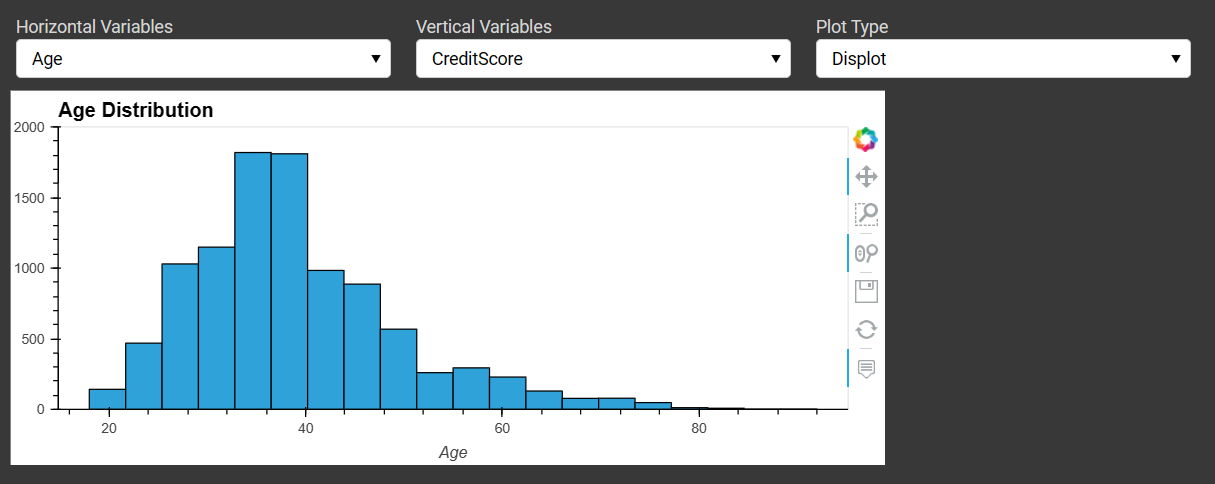

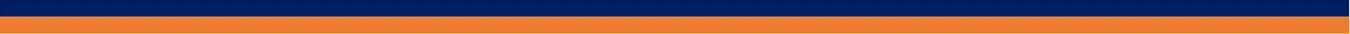

In [144]:
import pandas as pd
import panel as pn
import hvplot.pandas
import holoviews as hv

# Load data (not shown)
#data = pd.read_csv('my_data.csv')

# Define the available columns for the dropdowns
columns = list(data.columns)

# Define the available plot types for the dropdown
plot_types = {
    'Histogram': 'hist',
    'Boxplot': 'box',
    'Line Chart': 'line',
    'Scatter Plot': 'scatter',
    'Violin Plot': 'violin',
    'Displot': 'kde',
    'Summary Statistics Table': 'table',
    'Heatmap': 'heatmap'
}

# Define the plots
def get_plots(column_x, column_y, plot_type):
    if plot_type == 'hist':
        plot = data.hvplot.hist(column_x, title=f'{column_x} Distribution', bins=20)
    elif plot_type == 'box':
        plot = data.hvplot.box(y=column_y, title=f'{column_y} Distribution', groupby=None)
    elif plot_type == 'line':
        plot = data.hvplot.line(column_x, column_y, title=f'{column_y} by {column_x}')
    elif plot_type == 'scatter':
        plot = data.hvplot.scatter(column_x, column_y, c='color', cmap='viridis', title=f'{column_y} vs {column_x}')
    elif plot_type == 'violin':
        plot = data.hvplot.violin(column_x, column_y, title=f'{column_y} by {column_x}', groupby=None)
    elif plot_type == 'kde':
        plot = data.hvplot.kde(column_x, title=f'{column_x} Distribution')
    elif plot_type == 'table':
        plot = hv.Table(data[column_x].describe())
    elif plot_type == 'heatmap':
        plot = hv.HeatMap(data.corr())
    return plot

# Define the dropdown widgets
dropdown_x = pn.widgets.Select(name='Horizontal Variables', options=columns)
dropdown_y = pn.widgets.Select(name='Vertical Variables', options=columns)
dropdown_plot_type = pn.widgets.Select(name='Plot Type', options=plot_types)

def update_plots(*events):
    # Get the current values of the dropdown widgets
    column_x = dropdown_x.value
    column_y = dropdown_y.value
    plot_type = dropdown_plot_type.value

    # Generate the plot based on the selected values
    plot = get_plots(column_x, column_y, plot_type)

    # Update the panel with the new plot
    plot_panel[1] = pn.pane.HoloViews(plot)

# Bind the dropdowns to the update function
dropdown_x.param.watch(update_plots, 'value')
dropdown_y.param.watch(update_plots, 'value')
dropdown_plot_type.param.watch(update_plots, 'value')

# Create a layout for the plots and dropdowns
plot_panel = pn.Column(
    pn.Row(dropdown_x, dropdown_y, dropdown_plot_type),
    pn.pane.HoloViews(),
    sizing_mode='stretch_width'
)

# Serve the dashboard
update_plots(None)
plot_panel.servable()


Column(sizing_mode='stretch_width')
    [0] Row
        [0] Select(name='Horizontal Variables', options=['CreditScore', ...], value='CreditScore')
        [1] Select(name='Vertical Variables', options=['CreditScore', ...], value='CreditScore')
        [2] Select(name='Plot Type', options={'Histogram': 'hist', ...}, value='hist')
    [1] HoloViews(Histogram, height=300, sizing_mode='fixed', width=700)

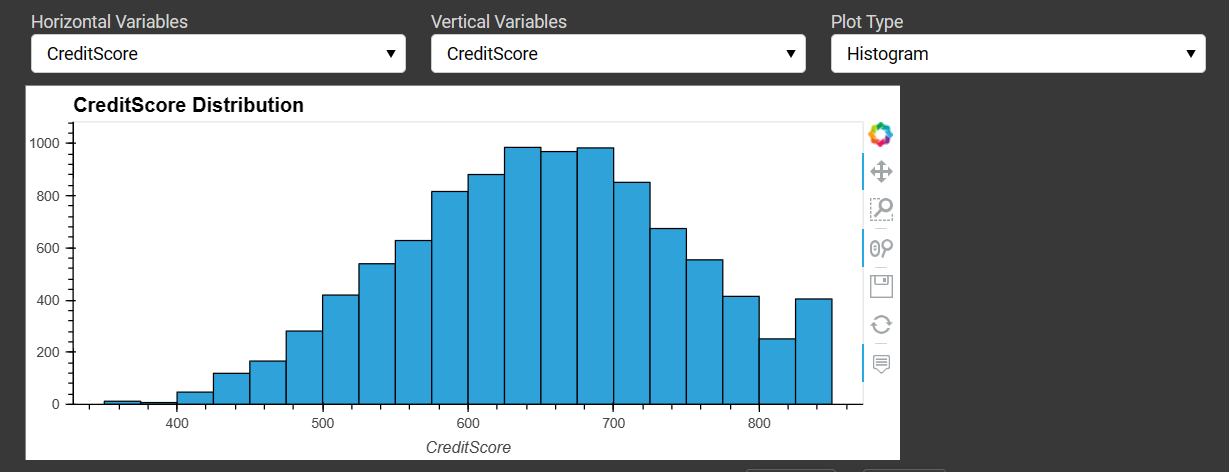

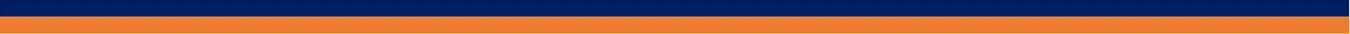

## Dash II:Distribution of Different Variables

In [136]:
# And we’ve written some code that smooths a time series and plots it using Matplotlib with outliers highlighted:
import matplotlib as mpl
mpl.use('agg')

from matplotlib.figure import Figure

def mpl_plot(avg, highlight):
    fig = Figure()
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='age', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

In [138]:
import param
import hvplot.pandas

import matplotlib as mpl
mpl.use('agg')

from matplotlib.figure import Figure

def mpl_plot(avg, highlight):
    fig = Figure()
    ax = fig.add_subplot()
    avg.plot(ax=ax, kind='box', color="red")
    if len(highlight):
        highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='CreditScore', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])


def hvplot(avg, highlight):
    return avg.hvplot(height=200) * highlight.hvplot.scatter(color='orange', padding=0.1)

class Select_Dropdown_Variable(param.Parameterized):
    variable  = param.Selector(objects=list(data.columns))
    window    = param.Integer(default=10, bounds=(1, 20))
    sigma     = param.Number(default=10, bounds=(0, 20))

    def view(self):
        return find_outliers(self.variable, self.window, self.sigma, view_fn=hvplot)

obj = Select_Dropdown_Variable ()
pn.Row(obj.param, obj.view)

Row
    [0] Column(margin=5, name='Select_Dropdown_Variable'..., width=300)
        [0] StaticText(value='<b>Select_Dropdown_Variab...)
        [1] Select(name='Variable', options=OrderedDict([('CreditScore...]), value='CreditScore')
        [2] IntSlider(end=20, name='Window', start=1, value=10)
        [3] FloatSlider(end=20, name='Sigma', value=10)
    [1] ParamMethod(method, _pane=HoloViews)

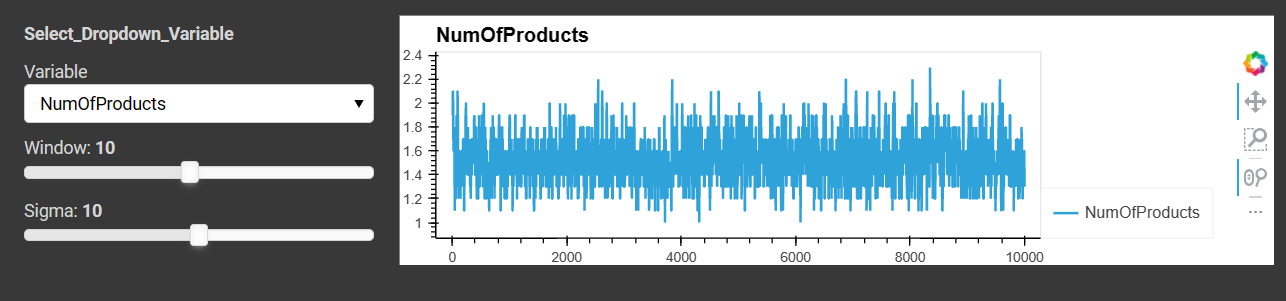

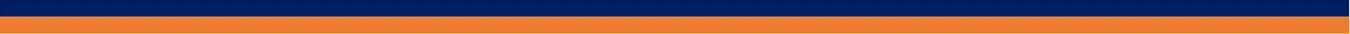

## DashII: Multivariate Distribution of Different Variables

In [139]:
columns = list(data.columns[0:-3])

x = pn.widgets.Select(value='CreditScore', options=columns, name='Horizontal Variables')
y = pn.widgets.Select(value='Gender', options=columns, name='Vertical Variables')

pn.Row(pn.Column('## Select Feature Option', x, y),
       pn.bind(data.hvplot.scatter, x, y, by="Gender"))

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='Horizontal Variables', options=['CreditScore', ...], value='CreditScore')
        [2] Select(name='Vertical Variables', options=['CreditScore', ...], value='Gender')
    [1] ParamFunction(function, _pane=HoloViews)

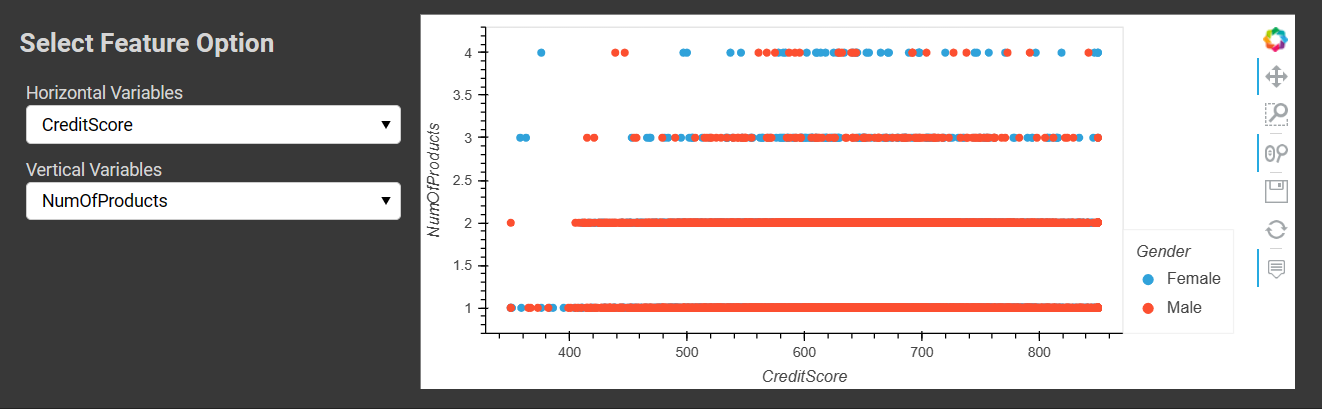

image.png

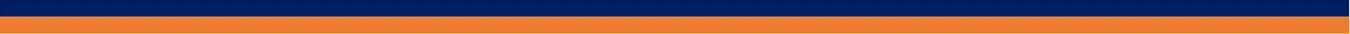

## Dash IV: Summary Statistics and Distributions

In [140]:
import pandas as pd
import panel as pn
import hvplot.pandas
import seaborn as sns


# Define the plots and tables
plots = {
    'Histogram': data.hvplot.hist(y='CreditScore', title='Age Distribution', bins=20),
    'Box Plot': data.hvplot.box(y='Balance', by='Exited', title='Balance Distribution'),
    'Line Chart': data.hvplot.line(x='Age', y='Balance', title='Balance by Age'),
    'Scatter Plot': data.hvplot.scatter(x='CreditScore', y='Age', c='Exited', cmap='viridis', title='Exited by CreditScore and Age'),
}

tables = {
    'Summary Statistics 1': data[['CreditScore', 'Balance']].describe().T.hvplot.table(title='Summary Statistics 1'),
    'Summary Statistics 2': data[['Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']].describe().T.hvplot.table(title='Summary Statistics 2'),
}

# Create the dropdown to select which plot or table to display
plot_dropdown = pn.widgets.Select(options=list(plots.keys()), name='Select a Plot')
table_dropdown = pn.widgets.Select(options=list(tables.keys()), name='Select a Table')

# Define a function to update the display based on the dropdown selection
def update_display(event):
    if event.obj == plot_dropdown:
        display_widget.object = plots[event.new]
    elif event.obj == table_dropdown:
        display_widget.object = tables[event.new]

# Create the initial display with the first plot
initial_plot = list(plots.keys())[0]
display_widget = pn.panel(plots[initial_plot])

# Combine the dropdown and the display in a panel layout
plot_dropdown.param.watch(update_display, 'value')
table_dropdown.param.watch(update_display, 'value')
dropdown_layout = pn.Row(plot_dropdown, table_dropdown)
layout = pn.Column(dropdown_layout, display_widget)

# Serve the dashboard
layout.servable()


Column
    [0] Row
        [0] Select(options=['Histogram', ...], value='Histogram')
        [1] Select(options=['Summary Statistics 1', ...], value='Summary Statistics 1')
    [1] HoloViews(Histogram, height=300, sizing_mode='fixed', width=700)

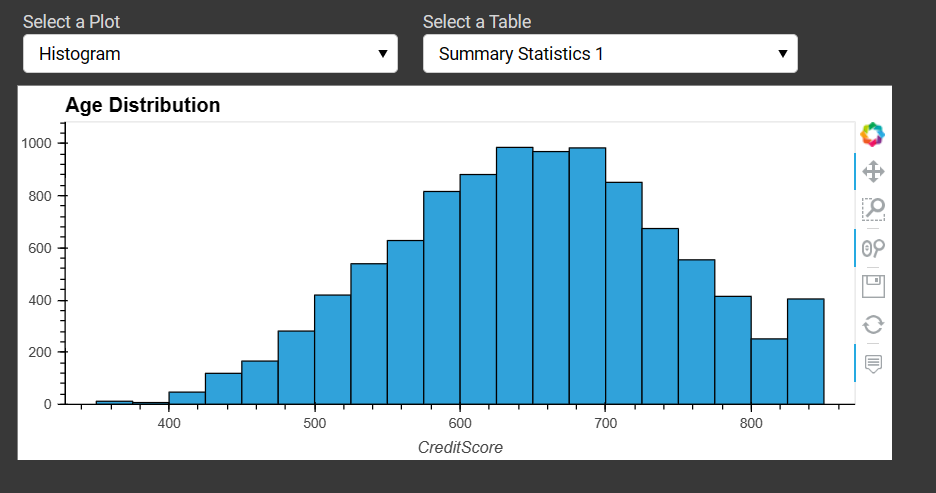

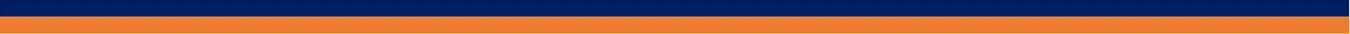

## Dash V: Master Dash Different Distributions

In [141]:
import pandas as pd
import panel as pn
import hvplot.pandas

# Define the dropdown menu options
numeric_cols = data.select_dtypes(include=['float', 'int']).columns.tolist()
dropdown_scatter = pn.widgets.Select(options=numeric_cols, name='Select a column for X-axis')
dropdown_box = pn.widgets.Select(options=numeric_cols, name='Select a column')

# Define a function to update the scatter plot based on the dropdown selection
def update_scatter(event):
    plot = data.hvplot.scatter(x=event.obj.value, y='Age', c='Exited', cmap='viridis', title='Scatter Plot')
    return plot

# Define a function to update the box plot based on the dropdown selection
def update_box(event):
    plot = data.hvplot.box(y=event.obj.value, by='Exited', title='Box Plot')
    return plot

# Create the initial plots with the first numerical column
initial_col_scatter = numeric_cols[0]
initial_col_box = numeric_cols[0]

# Create Scatter and Boxplots
scatter_plot = data.hvplot.scatter(x=initial_col_scatter, y='Age', c='Exited', cmap='viridis', title='Scatter Plot')
box_plot = data.hvplot.box(y=initial_col_box, by='Exited', title='Box Plot')

# Create Numerical Statistics
table1 = data[['CreditScore', 'Balance']].describe().T.hvplot.table(title='Summary Statistics 1')
table2 = data[['Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']].describe().T.hvplot.table(title='Summary Statistics 2')

# Create Correlation Heatmap
plt.figure(figsize=(30, 10))
heat_map = sns.heatmap(data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary', 'Exited']].corr(),
                       annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Creat KDE and Bar Charts
kde_plot = data.hvplot.kde(y='CreditScore', by='Exited', title='KDE Plot')
bar_plot = data.hvplot.bar(y='Balance', x='Geography', stacked=True, title='Bar Plot')

# Define the Bar and Stack Chart functions
def create_pie_chart(column):
    return data[column].value_counts().hvplot.bar(title=column, legend='right')

def create_bar_chart(column):
    return data[column].value_counts().hvplot.bar(title=column, legend='right')

def create_stacked_bar_chart(column):
    return data.groupby([column, 'Exited']).size().unstack().hvplot.bar(stacked=True, title=column, legend='right')

# Creat Histograms and line charts
line_plot = data.hvplot.line(x='Age', y='Balance', groupby='Exited', title='Line Plot')
hist_plot = data.hvplot.hist(y='CreditScore', by='Gender', title='Histogram')


# Create the charts
pie_chart1 = create_pie_chart('Geography')
bar_chart1 = create_bar_chart('Gender')
stacked_bar_chart1 = create_stacked_bar_chart('Tenure')
pie_chart2 = create_pie_chart('HasCrCard')
bar_chart2 = create_bar_chart('IsActiveMember')
stacked_bar_chart2 = create_stacked_bar_chart('NumOfProducts')

# Create Vilin Charts and Heatmape
violin_plot = data.hvplot.violin(y='Age', by='Exited', title='Violin Plot')
heatmap_plot = data.hvplot.heatmap(x='Geography', y='Age', C='Exited', reduce_function='mean', title='Heatmap')

# Combine the dropdowns and plots in a panel layout
dropdown_scatter.param.watch(update_scatter, 'value')
dropdown_box.param.watch(update_box, 'value')
scatter_box_layout = pn.Column(pn.Row(dropdown_scatter, dropdown_box), pn.Row(scatter_plot, box_plot))
kde_bar_layout = pn.Column(kde_plot, bar_plot)
tables_layout = pn.Row(table1, table2)
violin_heatmap_layout = pn.Column(violin_plot, heatmap_plot)
line_hist_layout = pn.Column(line_plot, hist_plot)



# Create a tabbed layout for the dashboard
dashboard_tabs = pn.Tabs(
    ("Scatter & Box", scatter_box_layout),
    ("KDE & Bar", kde_bar_layout),
    ("Violin & Heatmap", violin_heatmap_layout),
    ("Line & Histogram", line_hist_layout),
    ("Summary Tables", tables_layout),
    ('Geography', pn.Row(pie_chart1)),
    ('Gender', pn.Row(bar_chart1)),
    ('Tenure', pn.Row(stacked_bar_chart1)),
    ('HasCrCard', pn.Row(pie_chart2)),
    ('IsActiveMember', pn.Row(bar_chart2)),
    ('NumOfProducts', pn.Row(stacked_bar_chart2))
)

# Serve the dashboard
dashboard_tabs.servable()


Tabs
    [0] Column
        [0] Row
            [0] Select(options=['CreditScore', ...], value='CreditScore')
            [1] Select(options=['CreditScore', ...], value='CreditScore')
        [1] Row
            [0] HoloViews(Scatter, height=300, sizing_mode='fixed', width=700)
            [1] HoloViews(BoxWhisker, height=300, sizing_mode='fixed', width=700)
    [1] Column
        [0] HoloViews(NdOverlay, height=300, sizing_mode='fixed', width=700)
        [1] HoloViews(Bars, height=300, sizing_mode='fixed', width=700)
    [2] Column
        [0] HoloViews(Violin, height=300, sizing_mode='fixed', width=700)
        [1] HoloViews(HeatMap, height=300, sizing_mode='fixed', width=700)
    [3] Column
        [0] Row(height=300, sizing_mode='fixed', width=700)
            [0] HoloViews(DynamicMap, height=300, sizing_mode='fixed', width=700)
            [1] Column
                [0] WidgetBox
                    [0] DiscreteSlider(formatter='%d', margin=(20, 20, 20, 20), name='Exited', options=OrderedDict([('0', ...]), value=0, width=250)
                [1] VSpacer()
        [1] HoloViews(NdOverlay, height=300, sizing_mode='fixed', width=700)
    [4] Row
        [0] HoloViews(Table)
        [1] HoloViews(Table)
    [5] Row
        [0] HoloViews(Bars, height=300, sizing_mode='fixed', width=700)
    [6] Row
        [0] HoloViews(Bars, height=300, sizing_mode='fixed', width=700)
    [7] Row
        [0] HoloViews(Bars, height=300, sizing_mode='fixed', width=700)
    [8] Row
        [0] HoloViews(Bars, height=300, sizing_mode='fixed', width=700)
    [9] Row
        [0] HoloViews(Bars, height=300, sizing_mode='fixed', width=700)
    [10] Row
        [0] HoloViews(Bars, height=300, sizing_mode='fixed', width=700)

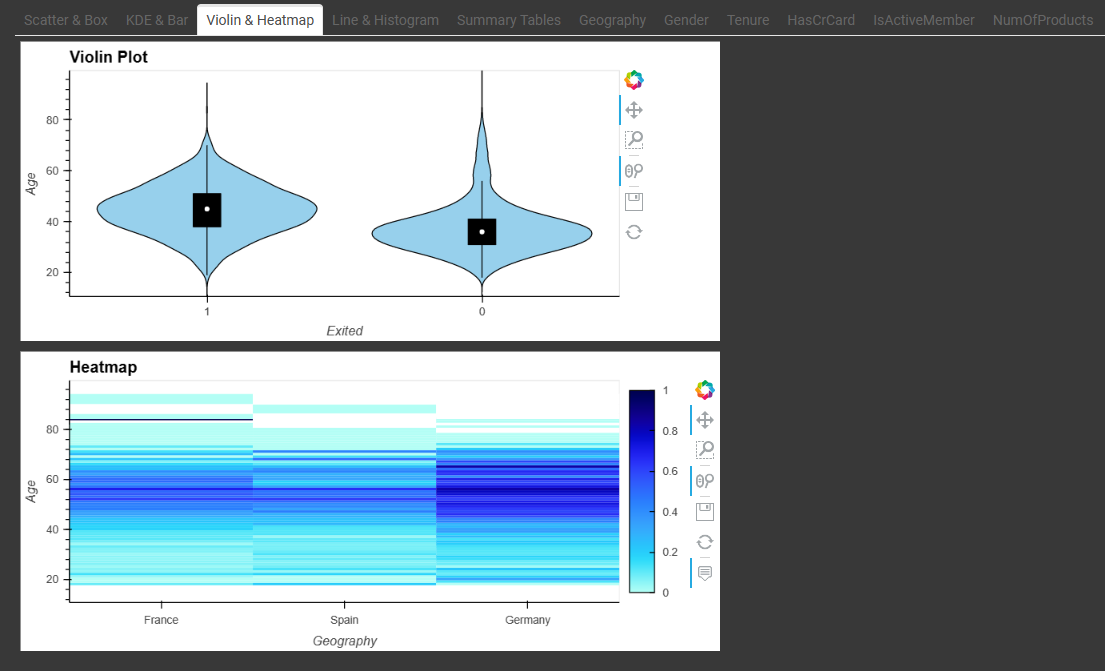

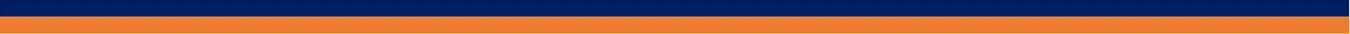

In [143]:
import pandas as pd
import panel as pn
import hvplot.pandas

# Get the list of numerical columns
numeric_cols = data.select_dtypes(include=['float', 'int']).columns.tolist()

# Create the dropdown menu with numerical columns
dropdown = pn.widgets.Select(options=numeric_cols, name='Select a column')

# Define a function to update the plot based on the dropdown selection
def update_plot(event):
    plot = data.hvplot.box(y=event.obj.value, title='Box plot of ' + event.obj.value)
    return plot

# Create the initial plot with the first numerical column
initial_col = numeric_cols[0]
plot = data.hvplot.box(y=initial_col, title='Box plot of ' + initial_col, color="red")

# Combine the dropdown and the plot in a panel layout
dropdown.param.watch(update_plot, 'value')
layout = pn.Row(dropdown, plot)

# Create a layout and serve the app
layout.servable()

Row
    [0] Select(options=['CreditScore', ...], value='CreditScore')
    [1] HoloViews(BoxWhisker, height=300, sizing_mode='fixed', width=700)

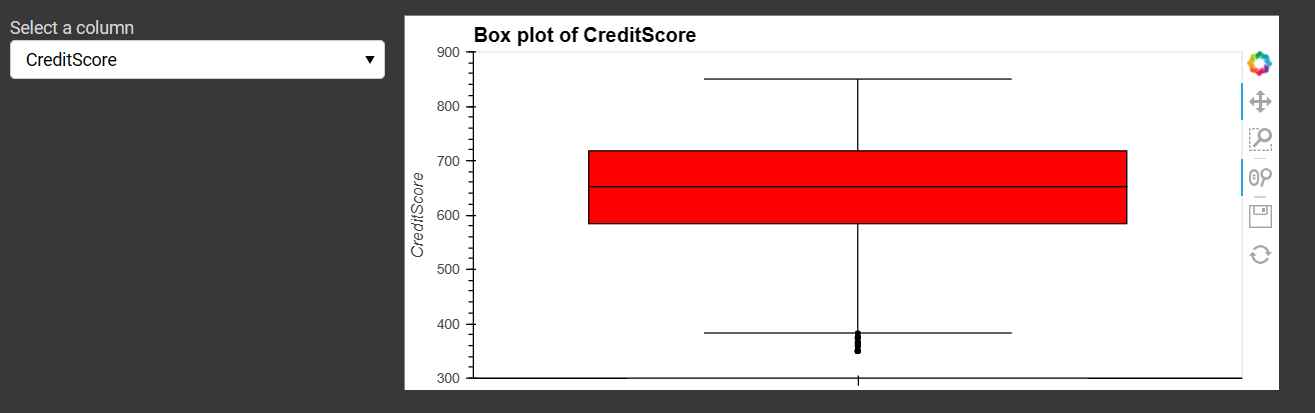

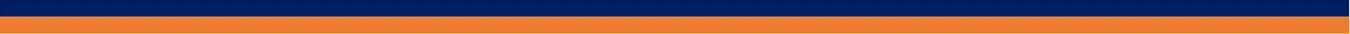

In [145]:
import holoviews as hv
import numpy as np
import pandas as pd
import param
import panel as pn

# Define a function to create the boxplot
def create_boxplot(data, variable):
    return data.hvplot.box(y=variable)

# Define the RoomOccupancy class with the dropdown and plot
class RoomOccupancy(param.Parameterized):
    variable = param.ObjectSelector(default=data.columns[0], objects=list(data.columns))
    
    @param.depends('variable')
    def view(self):
        return create_boxplot(data, self.variable)

# Define the dropdown widget to select the variable
variable_selector = hv.streams.Stream.define('Variable', variable=data.columns[0])(variable=data.columns[0])
variable_menu = pn.widgets.Select(options=list(data.columns), value=data.columns[0])

# Define a function to update the plot based on the dropdown value
def update_boxplot(variable):
    return create_boxplot(data, variable)

# Combine the widgets and the plot using a layout
layout = pn.Row(
    pn.Column(variable_menu),
    pn.Column(hv.DynamicMap(update_boxplot, streams=[variable_selector]))
)

# Create a layout and serve the app
layout.servable()

Row
    [0] Column
        [0] Select(options=['CreditScore', ...], value='CreditScore')
    [1] Column
        [0] HoloViews(DynamicMap, height=300, sizing_mode='fixed', width=700)

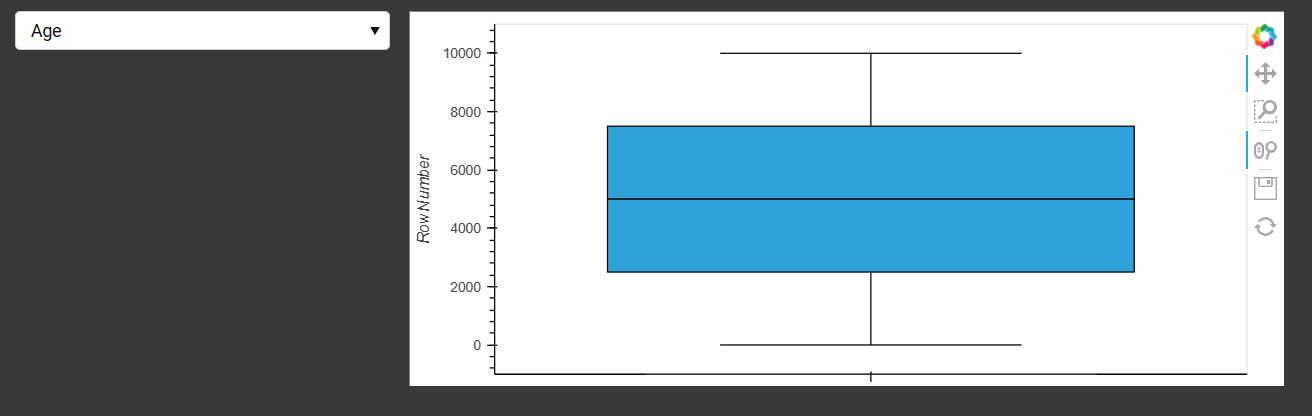

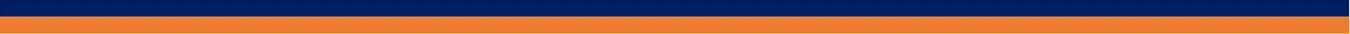